In [24]:
# !pip install pycaret
# !pip install openai
# !pip install --upgrade openai
# !pip install openai==1.55.3 httpx==0.27.2

In [25]:
import itertools

data_features = {
    "gender": ["Man", "Woman", "Trans man", "Trans Woman", "Non-binary", "Prefer not to answer"],
    "last_6_months": ["No", "Yes"],
    "partner_gender": ["Male", "Female", "Both", "Non-binary"],
    "partner_multiple": ["No", "Yes"],
    "sex_kind": ["Anal", "Vaginal",  "Oral"],
    "partner_discuss": ["No", "Yes"],
    "partner_hiv_status": ["I don’t ask", "Sometimes", "Always"],
    "partner_condom": ["Rarely or never", "Sometimes", "Always"],
    "sti_6_months": ["Never", "Unsure", "Yes"],
    "injected_drugs": ["Never", "Yes"],
    "sex_party": ["No", "Yes"],
    "sex_for_money": ["No", "Prefer Not to answer", "Yes"],
    "doctor_6": ["25%", "50%", "75%", "100%", "0%"]
}

combinations = list(itertools.product(*data_features.values()))

combination_dicts = [
    dict(zip(data_features.keys(), combination)) for combination in combinations
]

len(combination_dicts)

933120

In [26]:
data_features.keys()

dict_keys(['gender', 'last_6_months', 'partner_gender', 'partner_multiple', 'sex_kind', 'partner_discuss', 'partner_hiv_status', 'partner_condom', 'sti_6_months', 'injected_drugs', 'sex_party', 'sex_for_money', 'doctor_6'])

In [27]:
import pandas as pd

In [28]:
# data_path = "/home/ragserver/PrEP-Recomendation/data/data5.csv"

data_path = "/home/ragserver/PrEP-Recomendation/data/dataupdate_10Jan2024.csv"
df = pd.read_csv(data_path)#, encoding='latin-1')
df = df.rename(columns={"doctor_6": "PrEP_recommendation"})
df.keys()

Index(['gender', 'last_6_months', 'partner_gender', 'partner_multiple',
       'sex_kind', 'partner_discuss', 'partner_hiv_status', 'partner_condom',
       'sti_6_months', 'injected_drugs', 'sex_party', 'sex_for_money',
       'PrEP_recommendation'],
      dtype='object')

In [29]:
# Encode the data

data_features = {
  "gender": ["Man", "Woman", "Trans man", "Trans Woman", "Non-binary", "Prefer not to answer"],
  "last_6_months": ["No", "Yes"],
  "partner_gender": ["Male", "Female", "Both", "Non-binary"],
  "partner_multiple": ["No", "Yes"],
  "sex_kind": ["Vaginal", "Anal", "Oral"],
  "partner_discuss": ["No", "Yes"],
  "partner_hiv_status": ["I don’t ask", "Sometimes", "Always"],
  "partner_condom": ["Rarely or never", "Sometimes", "Always"],
  "sti_6_months": ["Never", "Unsure", "Yes"],
  "injected_drugs": ["Never", "Yes"],
  "sex_party": ["No", "Yes"],
  "sex_for_money": ["No", "Prefer Not to answer", "Yes"],
  "doctor_6": ["25%", "50%", "75%", "100%", "0%"]
}

##### Define Mapping #####
# Gender
yesno_mapping = {'No': 0, 'Yes': 1}

# 1
gender_mapping = {
  "Man": 0,
  "Woman": 1,
  "Non-binary": 2,
  "Trans man": 3,
  "Trans woman": 4,
  "Prefer not to answer": 5
}

#2
last_6_months_mapping = yesno_mapping

#3
partner_gender_mapping ={
  "Male": 0,
  "Female": 1,
  "Both": 2,
  "Non-binary": 3
}
partner_gender_class = list(partner_gender_mapping.keys())

#4
partner_multiple_mapping = yesno_mapping

#5
sex_kind_mapping ={
  "Oral":0,
  "Vaginal": 1,
  "Anal": 2
}
sex_kind_class = list(sex_kind_mapping.keys())

#6
partner_discuss_mapping = yesno_mapping

#7
partner_hiv_status_mapping = {
  'I don’t ask': 0,
  'Sometimes': 1,
  'Always': 2
}

#8
partner_condom_mapping = {
  "Rarely or never": 0,
  "Sometimes": 1,
  "Always": 2
}

#9
sti_6_months_mapping = {
  "Never": 0,
  "Unsure": 1,
  "Yes":2
}

#10
injected_drugs_mapping = {
  "Never": 0,
  "Yes": 1
}

#11
sex_party_mapping = yesno_mapping

#12
sex_for_money_mapping = {
  "No": 0,
  "Prefer Not to answer": 1,
  "Yes":2
}

#13
# PrEP_recommendation_mapping = {
#   "0%": 0,
#   "25%": 0,
#   "50%": 1,
#   "75%": 2,
#   "100%": 2
# }

PrEP_recommendation_mapping = {
  "0%": 0,
  "25%": 0,
  "50%": 0,
  "75%": 1,
  "100%": 1
}

def df2dfencode(df):

  ##### Mapping #####
  # Create a copy of the original DataFrame for encoding
  df_encode = pd.DataFrame()

  #1 Encoding Gender
  df_encode['gender'] = df['gender'].map(gender_mapping)

  #2 Encoding Last 6 Months
  df_encode['last_6_months'] = df['last_6_months'].map(last_6_months_mapping)

  #3 Encoding Partner Gender (Multi-Label Binarizer)
  partner_gender_list = df['partner_gender'].str.split(',').apply(lambda x: [item.strip() for item in x])
  partner_gender_class = ["Male", "Female", "Both", "Non-binary"]
  partner_gender_encoded = {
      f"partner_gender_{col}": partner_gender_list.apply(lambda x: col in x) for col in partner_gender_class
  }
  partner_gender_df = pd.DataFrame(partner_gender_encoded).astype(int)
  df_encode = pd.concat([df_encode, partner_gender_df], axis=1)

  #4 Encoding Partner Multiple
  df_encode['partner_multiple'] = df['partner_multiple'].map(partner_multiple_mapping)

  #5 Encoding Sex Kind (Multi-Label Binarizer)
  sex_kind_list = df['sex_kind'].str.split(',').apply(lambda x: [item.strip() for item in x])
  sex_kind_class = ['Oral', 'Vaginal', 'Anal']
  sex_kind_encoded = {
      f"sex_kind_gender_{col}": sex_kind_list.apply(lambda x: col in x) for col in sex_kind_class
  }
  sex_kind_df = pd.DataFrame(sex_kind_encoded).astype(int)
  df_encode = pd.concat([df_encode, sex_kind_df], axis=1)


  #6 Encoding Partner Discuss
  df_encode['partner_discuss'] = df['partner_discuss'].map(partner_discuss_mapping)

  #7 Encoding Partner HIV Status
  df_encode['partner_hiv_status'] = df['partner_hiv_status'].map(partner_hiv_status_mapping)

  #8 Encoding Partner Condom
  df_encode['partner_condom'] = df['partner_condom'].map(partner_condom_mapping)

  #9 Encoding STI in 6 Months
  df_encode['sti_6_months'] = df['sti_6_months'].map(sti_6_months_mapping)

  #10 Encoding Injected Drugs
  df_encode['injected_drugs'] = df['injected_drugs'].map(injected_drugs_mapping)

  #11 Encoding Sex Party
  df_encode['sex_party'] = df['sex_party'].map(sex_party_mapping)

  #12 Encoding Sex for Money
  df_encode['sex_for_money'] = df['sex_for_money'].map(sex_for_money_mapping)

  #13 Encoding Doctor Recommends PrEP as probabilities
  if "PrEP_recommendation" in df.columns:
    df_encode['PrEP_recommendation'] = df['PrEP_recommendation'].map(PrEP_recommendation_mapping)

  return df_encode

In [30]:
df_encode = df2dfencode(df)
df_encode

gender  last_6_months  partner_gender_Male  partner_gender_Female  \
0          0              0                    0                      0   
1          0              0                    0                      0   
2          0              0                    0                      0   
3          0              0                    0                      1   
4          0              0                    1                      0   
...      ...            ...                  ...                    ...   
1848       2              1                    1                      0   
1849       3              1                    1                      0   
1850       3              1                    1                      0   
1851       4              1                    1                      0   
1852       4              1                    1                      0   

      partner_gender_Both  partner_gender_Non-binary  partner_multiple  \
0                       1                          0                 0   
1                       1                          0                 0   
2                       1                          0                 0   
3                       0                          0                 0   
4                       0                          0                 0   
...                   ...                        ...               ...   
1848                    0                          0                 1   
1849                    0                          0                 1   
1850                    0                          0                 1   
1851                    0                          0                 1   
1852                    0                          0                 1   

      sex_kind_gender_Oral  sex_kind_gender_Vaginal  sex_kind_gender_Anal  \
0                        1                        0                     0   
1                        1                        0                     0   
2                        1                        0                     0   
3                        1                        0                     0   
4                        1                        0                     0   
...                    ...                      ...                   ...   
1848                     1                        0                     1   
1849                     0                        0                     1   
1850                     1                        0                     1   
1851                     1                        1                     1   
1852                     1                        1                     1   

      partner_discuss  partner_hiv_status  partner_condom  sti_6_months  \
0                   1                   1               1             0   
1                   1                   0               2             0   
2                   1                   1               1             0   
3                   0                   1               2             0   
4                   1                   0               2             0   
...               ...                 ...             ...           ...   
1848                1                   2               2             2   
1849                1                   2               2             2   
1850                0                   1               1             2   
1851                0                   0               1             2   
1852                0                   0               1             2   

      injected_drugs  sex_party  sex_for_money  PrEP_recommendation  
0                  0          0              0                    0  
1                  0          0              0                    0  
2                  0          0              0                    0  
3                  0          0              0                    0  
4                  0          0         

In [31]:
# Upsampling
from sklearn.utils import resample

random_state = 42

classes = []
classes_number = []
for label in PrEP_recommendation_mapping.values():
  classes.append(df_encode[df_encode['PrEP_recommendation'] == label])
  classes_number.append(len(classes[-1]))


# Find the class with the maximum count
max_count = max(classes_number)

classes_upsampled = []
for class_df in classes:
  # Upsample each class to match the maximum count
  class_upsampled = resample(class_df, replace=True, n_samples=max_count, random_state=random_state)
  classes_upsampled.append(class_upsampled)

df_upsampled = pd.concat(classes_upsampled)
df_upsampled = df_upsampled.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(df_upsampled['PrEP_recommendation'].value_counts())

PrEP_recommendation
0    3810
1    2540
Name: count, dtype: int64


# TRAIN MODEL

In [32]:
# Training the model

from pycaret.classification import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models, finalize_model, save_model
from imblearn.over_sampling import SMOTE


all_features = list(df_encode.keys())

chosen_features = all_features

data_df = df_encode[chosen_features]
# data_df = df_upsampled[chosen_features]

target = 'PrEP_recommendation'
X = data_df.drop(target, axis=1)
y = data_df[target]

all_data_df = pd.concat([X, y], axis=1)

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Balance Data
# # smote = SMOTE(random_state=42)
# # X_train, y_train = smote.fit_resample(X_train, y_train)

train_data_df = pd.concat([X_train, y_train], axis=1)
test_data_df = pd.concat([X_test, y_test], axis=1)

# Step 1: Set up the PyCaret environment with additional options for optimization
s = setup(
    data=train_data_df,
    target=target,
    session_id=123,
    normalize=True,
    feature_selection=False,  # Enable feature selection for better model performance
    fold_strategy='stratifiedkfold',  # Use stratified k-fold for balanced target distribution
    fold=20,  # Increase the number of folds for more robust validation
    remove_multicollinearity=True,  # Remove highly correlated features
    multicollinearity_threshold=0.9,  # Set a threshold for multicollinearity
    use_gpu=True  # Enable GPU acceleration if supported
)

# Step 2: Compare models and select the best-performing one
best_model = compare_models(sort='Accuracy')  # Sort models by Accuracy (or other metrics if preferred)

# Step 3: Finalize the best model on the entire dataset
final_model = finalize_model(best_model)

# Step 4: Save the finalized model for future use
save_model(final_model, 'optimized_best_model')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla M10, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split re

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla M10, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split re

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'last_6_months',
                                              'partner_gender_Male',
                                              'partner_gender_Female',
                                              'partner_gender_Both',
                                              'partner_gender_Non-binary',
                                              'partner_multiple',
                                              'sex_kind_gender_Oral',
                                              'sex_kind_gender_Vaginal',
                                              'sex_kind_gender_Anal',
                                              'partner_discuss',
                                              'partner_hiv_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

In [33]:
from pycaret.classification import predict_model, pull

# Step 5: Evaluate the finalized model on the test set

all_data_df = pd.concat([X, y], axis=1)
evaluation_data_df = all_data_df

evaluation_results = predict_model(final_model, data=evaluation_data_df)

# Display the evaluation metrics
print("Evaluation Metrics on Test Data:")
metrics = pull()  # Pull the evaluation metrics from the last run
print(metrics)

# Optional: Save the predictions for further analysis
evaluation_results.to_csv('test_data_predictions.csv', index=False)

Evaluation Metrics on Test Data:
                      Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.9746  0.9976   0.985  0.9781  0.9816  0.9409   

     MCC  
0  0.941  


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

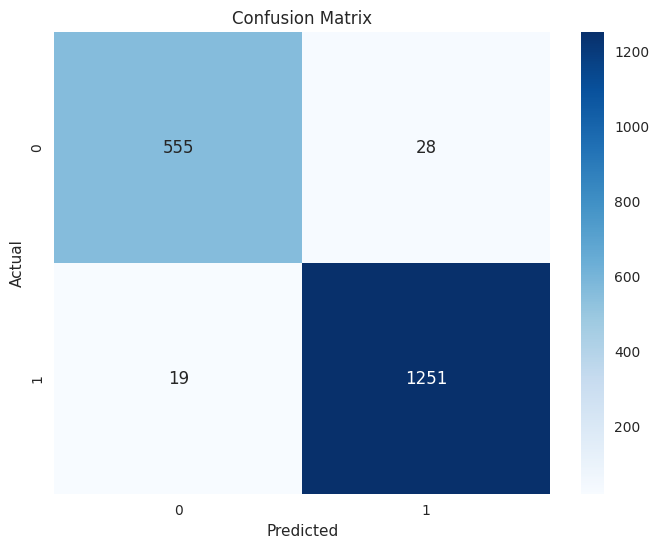

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       583
           1       0.98      0.99      0.98      1270

    accuracy                           0.97      1853
   macro avg       0.97      0.97      0.97      1853
weighted avg       0.97      0.97      0.97      1853



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6: Generate predictions for test data
y_true = evaluation_data_df[target]
y_pred = predict_model(final_model, data=evaluation_data_df)['prediction_label']


# Step 7: Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 8: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [35]:
pwd

'/home/ragserver/PrEP-Recomendation'

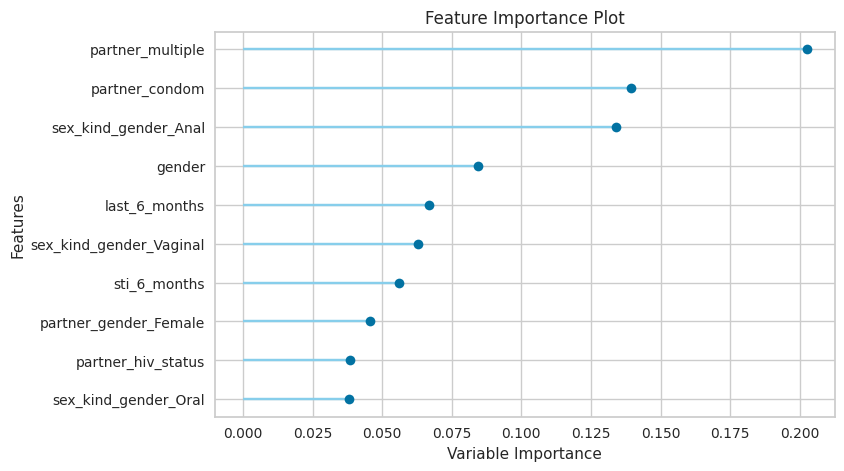

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'last_6_months',
                                              'partner_gender_Male',
                                              'partner_gender_Female',
                                              'partner_gender_Both',
                                              'partner_gender_Non-binary',
                                              'partner_multiple',
                                              'sex_kind_gender_Oral',
                                              'sex_kind_gender_Vaginal',
                                              'sex_kind_gender_Anal',
                                              'partner_discuss',
                                              'partner_hiv_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

In [36]:
# Import necessary functions
from pycaret.classification import plot_model

# Finalize the best model
final_model = finalize_model(final_model)

# Plot feature importance
plot_model(final_model, plot='feature')

save_model(final_model, model_name="models/model_update_11jan24")

In [37]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'last_6_months',
                                             'partner_gender_Male',
                                             'partner_gender_Female',
                                             'partner_gender_Both',
                                             'partner_gender_Non-binary',
                                             'partner_multiple',
                                             'sex_kind_gender_Oral',
                                             'sex_kind_gender_Vaginal',
                                             'sex_kind_gender_Anal',
                                             'partner_discuss',
                                             'partner_hiv_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

# Prediction

In [38]:
MLmodel = load_model('./models/optimized_best_model')

def clientprofiledict2inputdf(client_profile):
  # print(client_profile.keys())

  # dict -> df with 12 original keys
  encoded_client_profile_df = pd.DataFrame([client_profile])
  # print(encoded_client_profile_df.keys())

  # df -> df with keys converting and and values 0,1,2,3, ..
  encoded_client_profile_df = df2dfencode(encoded_client_profile_df)
  # print(encoded_client_profile_df.keys())

  return encoded_client_profile_df

def MLEvaluate_PrEP_recommendation(client_profile):

    encoded_client_profile_df = clientprofiledict2inputdf(client_profile)

    # print(len(encoded_client_profile_df.keys()), encoded_client_profile_df)

    predictions = predict_model(MLmodel, data=encoded_client_profile_df)

    return predictions['prediction_label'].values, predictions['prediction_score'].values

def MLPrEPinterpretation(MLPrEP_prediction_label, MLPrEP_prediction_score):

    if MLPrEP_prediction_label[0] == 0:
        PrEP_YesNo = "Do not Recommend"
    elif MLPrEP_prediction_label[0] == 1:
        PrEP_YesNo = "Recommend PrEP"
    else:
        PrEP_YesNo = "Strongly Recommend PrEP"

    PrEP_YesNo_score = MLPrEP_prediction_score[0]

    return PrEP_YesNo, PrEP_YesNo_score

def generate_prep_prompt(client_info, yesno_recommendation, yesno_recommendation_score, concerns=""):

    """Generate a prompt for the LLM recommendation."""
    prompt = f"""
    You are a healthcare professional tasked with evaluating the suitability of PrEP (pre-exposure prophylaxis) for individuals based on their risk factors.

    PrEP is a preventive medication for individuals who are HIV-negative and at high risk of HIV exposure through sexual activity or injection drug use. It is not suitable for individuals who are HIV-positive.

    PrEP is recommended for anyone with HIV negative and:
    - Condomless vaginal or anal sex with a partner of unknown HIV status
    - HIV-positive sex partner (especially if partner's HIV viral load is detectable or unknown)
    - A recent bacterial sexually transmitted infection (STI) (gonorrhea/chlamydia/syphilis)
    - Injection drug use with sharing of needles/equipment
    - Any survival/transactional sex
    - Desire to conceive with a partner who is HIV-positive

    With Contraindications
    - HIV infection
    - Weight < 77 lbs
    - Estimated creatinine clearance (eCrCl) < 60 mL/min for TDF/FTC or < 30 mL/min for TAF/FTC
    - Possible HIV exposure within the past 72 hours: instead offer nPEP, then consider PrEP

    Provided Client Information:
    {client_info}

    Other Concerns:
    {concerns}

    Evaluate whether PrEP is recommended and provide a clear, simple explanation. If concern mentioned, please explain how might related to HIV. Also compare the result with the result from ML is {yesno_recommendation}.
    If both agree, give a recomendation. If not, find a way to explain.
    """

    return prompt

def rename_client_info_keys(client_profile):
  # Mapping of original keys to more meaningful keys
  key_mapping = {
      "gender": "gender_identity",
      "last_6_months": "sexual_activity_last_6_months",
      "partner_gender": "partner_gender",
      "partner_multiple": "multiple_sexual_partners",
      "sex_kind": "types_of_sexual_contact",
      "partner_discuss": "discuss_sti_hiv_prevention_with_partner",
      "partner_hiv_status": "know_partner_hiv_status",
      "partner_condom": "condom_usage_frequency",
      "sti_6_months": "sti_diagnosis_last_6_months",
      "injected_drugs": "injected_drugs",
      "sex_party": "participate_in_chemsex_parties",
      "sex_for_money": "sex_worker_status",
  }

  # Create a new dictionary with updated keys
  rename_client_profile = {key_mapping.get(k, k): v for k, v in client_profile.items()}

  return rename_client_profile

FileNotFoundError: [Errno 2] No such file or directory: './models/optimized_best_model.pkl'

In [15]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv('./env/key.env')
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

In [16]:
def get_llm_recommendation(client_profile, PrEP_YesNo, PrEP_YesNo_score, concerns="", temperature=0.5):

    rename_client_profile = rename_client_info_keys(client_profile)

    client_profile_prompt = generate_prep_prompt(client_profile, PrEP_YesNo, round(PrEP_YesNo_score, 2), concerns)

    # Get Risk Factors
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "Summarize the client factors in 1 sentence by listing unsafe factors and safe factors of getting STIs and HIV."},
                {"role": "user", "content":  str(rename_client_profile)},
            ],
            temperature=temperature
        )
        risk_factors_explaination = response.choices[0].message.content
    except Exception as e:
        risk_factors_explaination = f"An error occurred: {str(e)}"

    # LLM recomendation
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a professional healthcare assistant."},
                {"role": "user", "content": client_profile_prompt},
            ],
            temperature=temperature  # Configurable creativity
        )
        detailed_recommendation = response.choices[0].message.content
    except Exception as e:
        detailed_recommendation = f"An error occurred: {str(e)}"

    explainations = {
        "risk_factors_explaination": risk_factors_explaination,
        "detailed_recommendation": detailed_recommendation
    }

    return risk_factors_explaination, detailed_recommendation


def make_prediction_and_recommend(client_profile, concerns="", temperature=0.9):

    MLPrEP_prediction_label, MLPrEP_prediction_score = MLEvaluate_PrEP_recommendation(client_profile)

    PrEP_YesNo, PrEP_YesNo_score = MLPrEPinterpretation(MLPrEP_prediction_label, MLPrEP_prediction_score)

    risk_factors_explaination, detailed_recommendation = get_llm_recommendation(client_profile, PrEP_YesNo, PrEP_YesNo_score, concerns=concerns, temperature=temperature)

    # print(str(round(PrEP_YesNo_score, 2)))

    results = {
        "PrEP_YesNo": PrEP_YesNo,
        "PrEP_YesNo_score": str(round(PrEP_YesNo_score, 2)),
        "risk_factors_explaination": risk_factors_explaination,
        "detail_recommendation": detailed_recommendation
    }
    
    return results

In [ ]:
client_profile = {
    'gender': 'Man',
    'last_6_months': 'Yes',
    'partner_gender': 'Both',
    'partner_multiple': 'Yes',
    'sex_kind': 'Oral',
    'partner_discuss': 'No',
    'partner_hiv_status': 'Always',
    'partner_condom': 'Always',
    'sti_6_months': 'Yes',
    'injected_drugs': 'Yes',
    'sex_party': 'No',
    'sex_for_money': 'No'
}

result = make_prediction_and_recommend(client_profile, concerns="", temperature=0.9)

# Extract results with fallback defaults
PrEP_YesNo = result.get("PrEP_YesNo", "Not Available")
PrEP_YesNo_score = result.get("PrEP_YesNo_score", "Not Available")
risk_factors_explaination = result.get(
    "risk_factors_explaination", "No risk factors explained."
)
detailed_recommendation = result.get(
    "detail_recommendation", "No detailed recommendation available."
)

In [18]:
PrEP_YesNo

'Do not Recommend'

In [19]:
PrEP_YesNo_score

'0.96'

In [20]:
risk_factors_explaination

"Unsafe factors include engaging in sexual activity with multiple partners of different genders, having oral sex, not discussing STI/HIV prevention with partners, having a recent STI diagnosis, and injecting drugs. Safe factors include always knowing the partner's HIV status and consistently using condoms."

In [21]:
detailed_recommendation

'Based on the provided client information and the eligibility criteria for PrEP, let\'s evaluate whether PrEP is recommended:\n\n### Client Information Evaluation:\n\n- **Gender**: Man\n- **Sexual Activity in Last 6 Months**: Yes\n- **Partner Gender**: Both\n- **Multiple Partners**: Yes\n- **Type of Sexual Activities**: Oral\n- **Discussion of Partner\'s HIV Status**: No\n- **Known HIV Status of Partners**: Always\n- **Condom Usage**: Always\n- **STI in Last 6 Months**: Yes\n- **Injected Drugs**: Yes\n- **Sex Parties**: No\n- **Transactional Sex**: No\n\n### PrEP Suitability Factors:\n\n1. **Condomless Vaginal or Anal Sex with Unknown Status Partner**: The client always uses condoms, thus reducing this risk factor.\n   \n2. **HIV-Positive Sex Partner**: Not applicable as per the data—always unknown, no specific partner status is given.\n   \n3. **Recent Bacterial STI**: The client has had a recent STI, which is a significant risk factor for HIV. This supports considering PrEP.\n   \n4.